<a href="https://colab.research.google.com/github/merriekay/ASL_translate/blob/main/video_to_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Function to Convert all videos from list of users to images

In [2]:
import cv2
import os

def vid_to_images(from_dir, to_dir, users):
  for id in users:

    for filename in os.listdir(from_dir):
      #print(filename)
      stripped = filename.split('.')[0]
      user = stripped.split('_')[0]
      if user != 'background':
        letter = stripped.split('_')[1] 
      else:
        letter = 'bg'

      if user == id:
        print("working on user ", user, ': ', letter)
        f = os.path.join(from_directory, filename)
        vidcap = cv2.VideoCapture(f)
        success,image = vidcap.read()
        count = 0

        while success: 
          jpg ="{}_{}_{}.jpg".format(user, count, letter)
          path = os.path.join(to_dir, jpg)
          #print(path)
          cv2.imwrite(path, image)     # save frame as JPEG file      
          success,image = vidcap.read()
          count += 1

In [ ]:
# This code will take in a directory that has videos in it, a target directory 
# and a list of users. It will create images from each frame of each video from the designated users

# So far, I've added users 001, 002, 003, 004, 005, 006, 007, 008
from_directory = '/content/drive/MyDrive/ASL Dataset Project/Videos/'
to_directory = '/content/drive/MyDrive/ASL Dataset Project/Images/'
vid_to_images(from_directory, to_directory, ['008'])

working on user  008 :  a
working on user  008 :  b
working on user  008 :  c
working on user  008 :  d
working on user  008 :  e
working on user  008 :  f
working on user  008 :  g
working on user  008 :  h
working on user  008 :  i
working on user  008 :  j
working on user  008 :  k
working on user  008 :  l
working on user  008 :  m
working on user  008 :  n
working on user  008 :  o
working on user  008 :  p
working on user  008 :  q
working on user  008 :  r
working on user  008 :  s
working on user  008 :  t
working on user  008 :  u
working on user  008 :  v
working on user  008 :  w
working on user  008 :  x
working on user  008 :  y
working on user  008 :  z


## Display Images

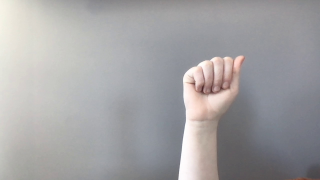

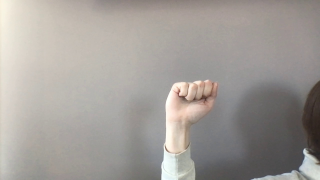

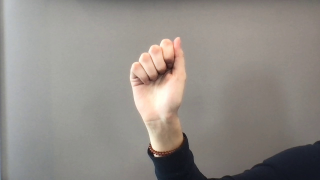

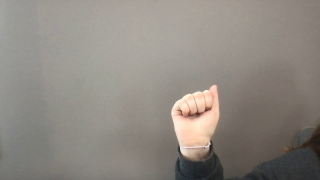

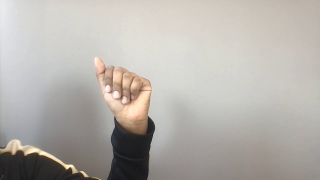

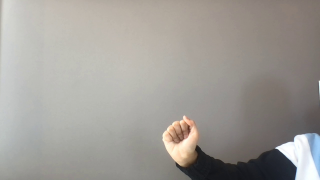

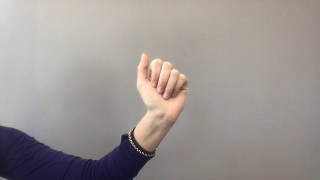

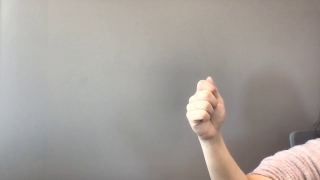

In [17]:
def display_image(path):
  from google.colab.patches import cv2_imshow
  img = cv2.imread(path)

  scale_percent = 25 # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized)

img001 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/001_18_a.jpg')
img002 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/002_18_a.jpg')
img003 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/003_18_a.jpg')
img004 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/004_18_a.jpg')
img005 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/005_18_a.jpg')
img006 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/006_18_a.jpg')
img007 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/007_18_a.jpg')
img008 = display_image('/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/008_11_a.jpg')

#horiz = np.concatenate((img001, img002, img003, img004), axis=1)
#verti = np.concatenate((img005, img006, img007, img008), axis=0)

#cv2.imshow('HORIZONTAL', horiz)
#cv2.imshow('VERTICAL',verti)


## Extract Background images

In [ ]:
import cv2
import os

def bg_vids_to_images(from_dir, to_dir, num_vids):
  count = 0
  converted = []
  for filename in os.listdir(from_dir):
    stripped = filename.split('.')[0]
    first_part = stripped.split('_')[0]
    print(first_part)

    if first_part == 'bg':
      num_vid = stripped.split('_')[1]
      if num_vid in num_vids:
        f = os.path.join(from_directory, filename)
        vidcap = cv2.VideoCapture(f)
        success,image = vidcap.read()

        while success: 
          jpg ="bg_{}.jpg".format(count)
          path = os.path.join(to_dir, jpg)
          print(path)
          cv2.imwrite(path, image)     # save frame as JPEG file      
          success,image = vidcap.read()
          count += 1
  print('you have converted these bg vids to images:', converted)

In [ ]:
# This code will take in a directory that has videos in it, a target directory 
# and a list of users. It will create images from each frame of each video from the designated users

# So far, I've added users 001, 002
from_directory = '/content/drive/MyDrive/ASL Dataset Project/Videos/background/'
to_directory = '/content/drive/MyDrive/ASL Dataset Project/Images/'
bg_vids_to_images(from_directory, to_directory,['1'])

## Build a Dataframe from the dataset

In [ ]:
# Create a data frame for each file that has: filename, subject ID, letter, skintone, etc
import pandas as pd

directory = '/content/drive/MyDrive/Student Research Projects/ASL Dataset Project/Images/'

df = pd.DataFrame(columns=('filename', 'subject_ID', 'letter'))
count = 0
for f in os.listdir(directory):
  print(f)
  count +=1
  stripped = f.split('.')[0]
  user = stripped.split('_')[0]
  if user != 'bg':
    letter = stripped.split('_')[2] 
  else: 
    letter = 'bg'

  #ideally we'll add a function here that will calculate the user's skin tone
  values_to_add = pd.Series({'filename': f,'subject_ID': user,'letter': letter},name=count )
  df.loc[count] = values_to_add


In [ ]:
def calculate_skin_tone(filename):

In [6]:
df.head()

,filename,subject_ID,letter
1,008_50_r.jpg,008,r
2,008_51_r.jpg,008,r
3,008_52_r.jpg,008,r
4,008_53_r.jpg,008,r
5,008_54_r.jpg,008,r


## Plot some stuff

Relevant Metadata:
- 8 participants
- 19843 images
- we have at least 585 images per letter

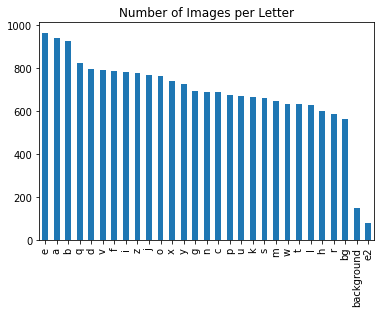

In [18]:
df['letter'].value_counts().plot(kind='bar', title='Number of Images per Letter')

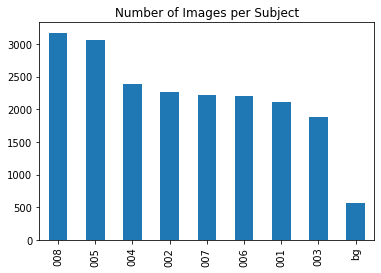

In [19]:
df['subject_ID'].value_counts().plot(kind='bar', title='Number of Images per Subject')

In [20]:
df.describe()

,filename,subject_ID,letter
count,19843,19843,19843
unique,19843,9,29
top,008_50_r.jpg,008,e
freq,1,3169,965


## To Do:

Possibilities include:
- add segmentation--put a bounding box around the hand
- Quantify skin color
  - Ideas: histograms, etc
  - How to handle sleeves?
- Test the other datasets for the range in skintones
- What should the skin tone color distrution be for the model to work for everyone?
- Train different models with different distrubtions and see how they work on test sets with different skin tones. 